# Anomaly detection:
- identify rare events that deviate significantly from majority of the data.
- Used in real life applications 

# Why anamoly detection?
- Unexpected events can be caused by production faults or system defects.
- outliers can affect the performance of forecasting the models.

## There are 2 types of anomaly detection tasks, they are:
- Point wise anomaly detection.
- Pattern wise anomaly detection.

### Point wise:
looking at isolated points and marking them as anomalies.
<br/>

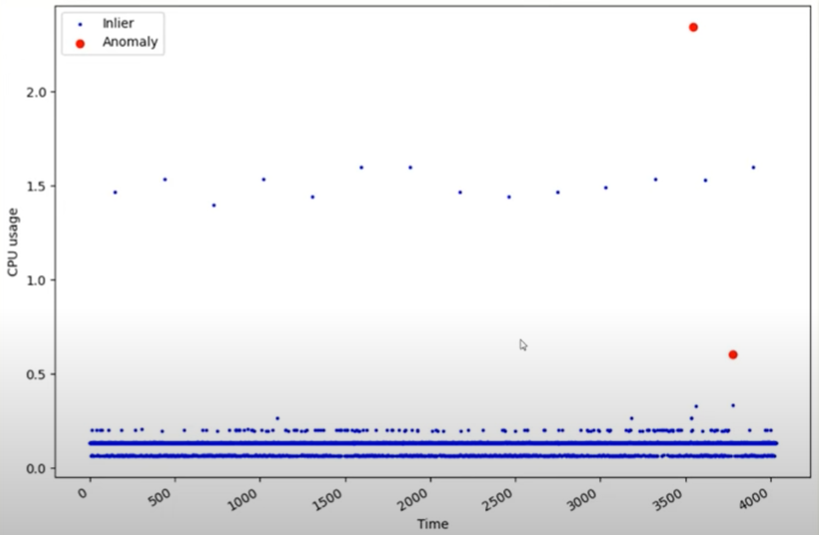

<br/>

### Pattern wise:
looking at sequence of points and identifying anomalies in the sequence.
<br/>

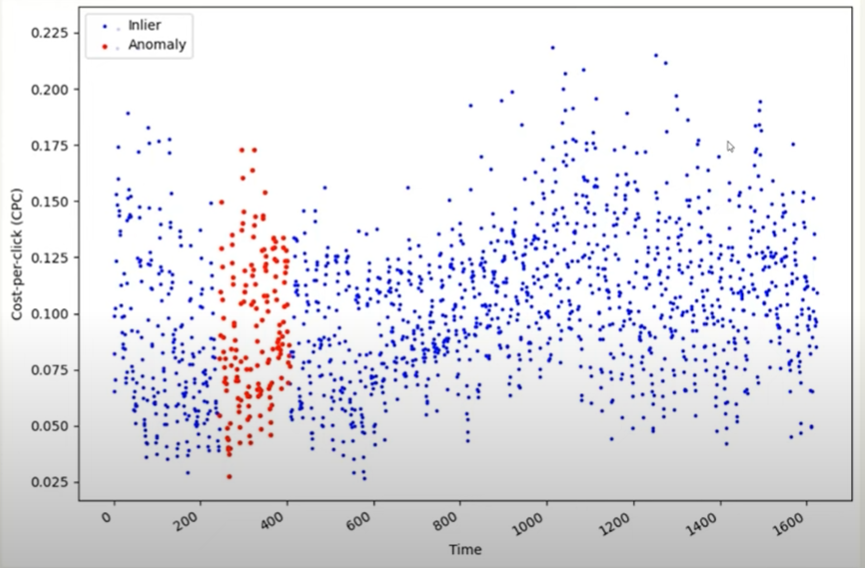

<br/>

# Methods to identify outliers in timeseries data:

- Mean Absolute Deviation (MAD): When data is normally distributed, we can reasonably conclude that points at each     tail are outliers. (ONLY FOR NORMALLY DISTRIBUTED METHOD)
    - It is done using z score method <br>
    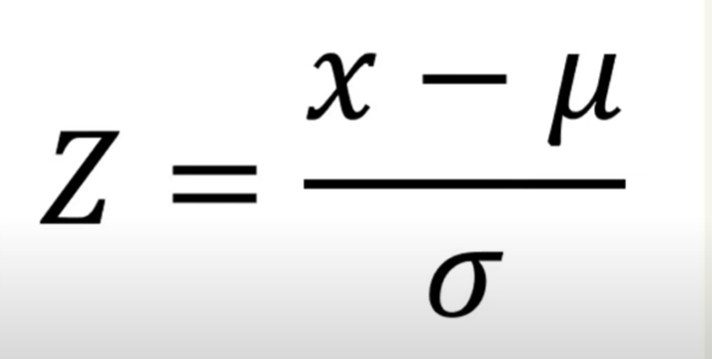

    <br>

    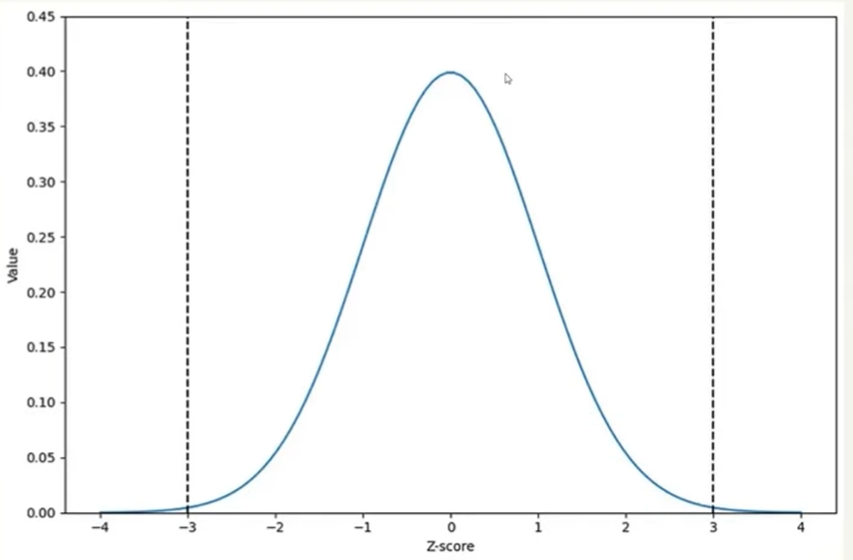

    <br>
    - The outpliers affect the mean, also the z score


    - So we use robust z score method that uses median instead of mean 
    <br>

    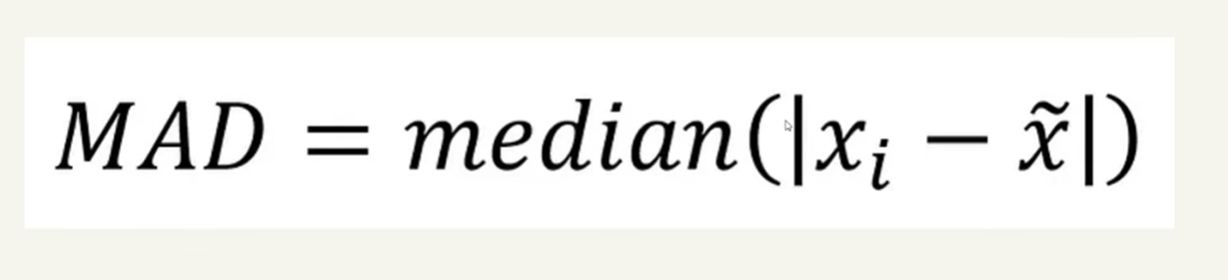
    
    <br>

    - robust z score:
    <br>
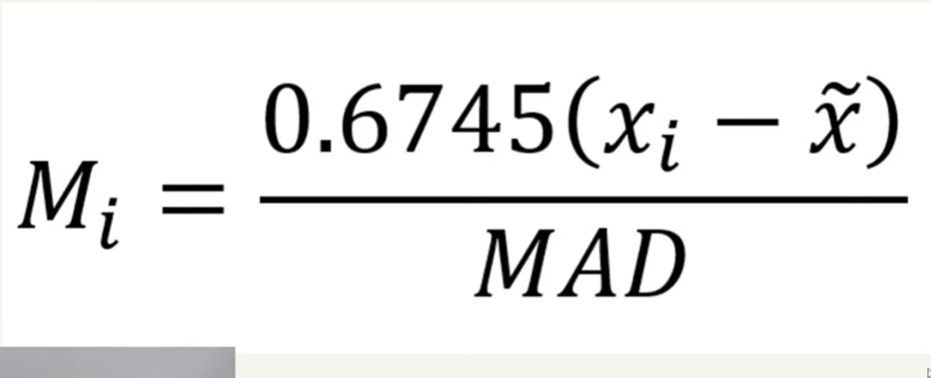
    <br>
        - We use 0.6745 because z score uses median cented value and usually smaller than 

*NOTE: ROBUST Z SCORE ONLY WORKS WHEN THE DATA IS CLOSER TO NORMAL DISTRIBUTION, THE MAD SHOULD NOT BE EQUALS TO ZERO*



# ISOLATION FOREST:
- Tree based algorithm to detect outliers.
- Partitions the data to many isolate points
    - Many partitions: means the point is an inlier
    - few partitions: means that the point is an outlier
    <br>
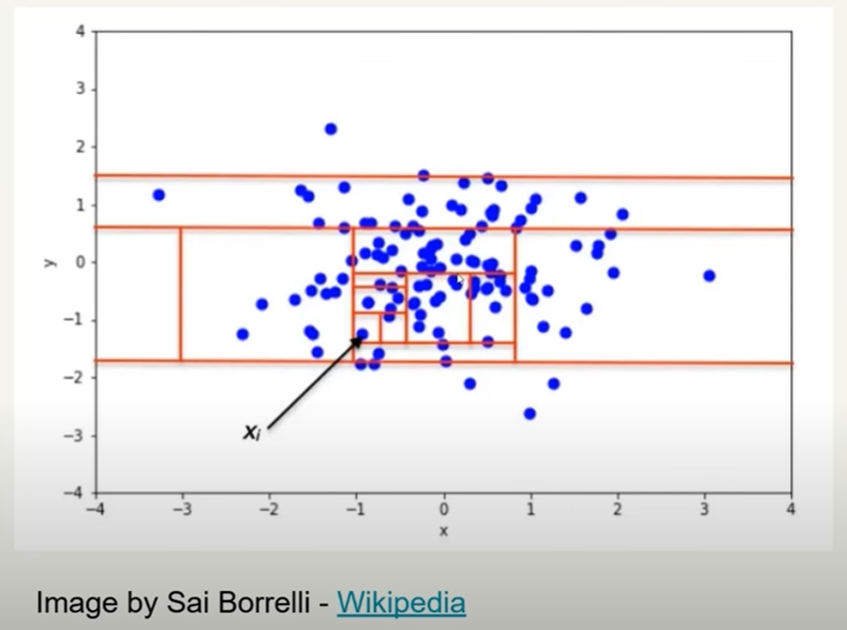
    <br>

    - In the below example, Xj is an outlier
  
    <br>

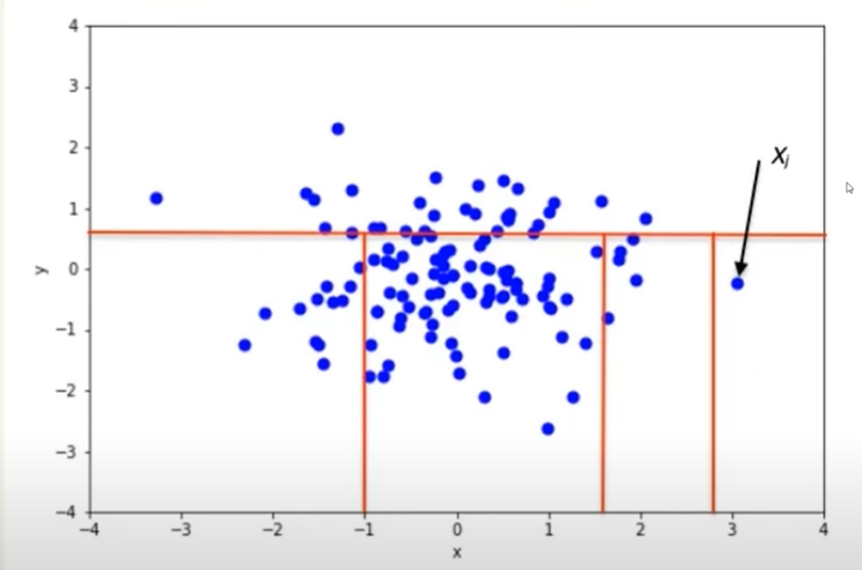
    <br>

In [2]:
from sklearn.ensemble import IsolationForest

?IsolationForest

Init signature:
IsolationForest(
    *,
    n_estimators=100,
    max_samples='auto',
    contamination='auto',
    max_features=1.0,
    bootstrap=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)
Docstring:     
Isolation Forest Algorithm.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the
number of splittings required to isolate a sample is equivalent to the path
length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a
measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies.
Hence, when a forest of random trees collectively produce shorter path
len

In [ ]:
# Contamination level of an isolation forest is generally considered 1/length(training_data) and random state=42

## Local Outlier Factor (LOF)

- unsupervised method for anomaly detection.

- Intution: compare the local density of a point to that of its neighbors.

- if density is less point is outlier otherwise it is an inlier.

- METRIC USE DFOR LOF is Reachability distance:<br>
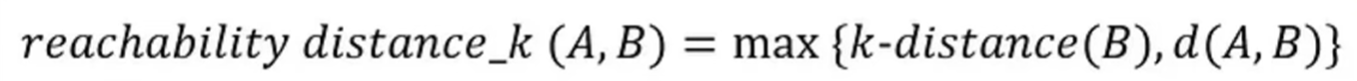
<br>

- Once we have reachability distance calculated from all k nearest neighbors of A, we can calculate the local reachability density
<br>

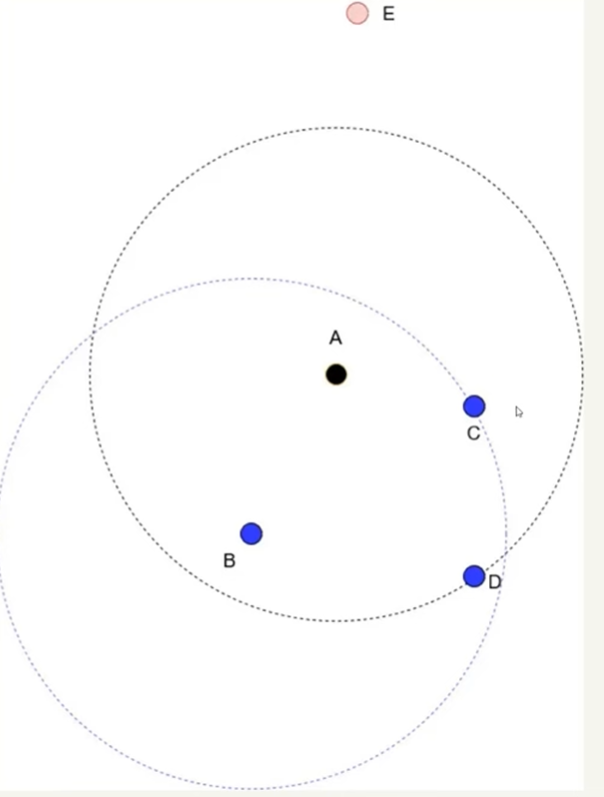
<br>

- Local reachability density can be calculated by INVERSE OF AVERAGE BY ALL THE REACHABILITY DISTANCES

- If LOF is close to 1 or smaller than 1 the point is inlier, or else it is an outlier.

- LOF is present in sklearn

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# LOF also takes the same contamination as IsolationForest.
# novelty = True lets the model predict if we have anomalies in new data or not.
?LocalOutlierFactor

Init signature:
LocalOutlierFactor(
    n_neighbors=20,
    *,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=None,
)
Docstring:     
Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor.
It measures the local deviation of the density of a given sample with respect
to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of its
neighbors, one can identify samples that have a substantially lower density
than their neighbors. These are considered outliers.

.. versionadded:: 0.19

Parameters
----------
n_neighbors : int, default=20
    Number o